<a href="https://colab.research.google.com/github/arnab-mkj/Time_Series/blob/main/ARIMA_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _ , filenames in os.walk('/content/sample_data'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mukeshmanral/univariate-time-series")

print("Path to dataset files:", path)

100%|██████████| 2.18k/2.18k [00:00<00:00, 2.59MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mukeshmanral/univariate-time-series/versions/1


In [ ]:
# prompt: move the file from that path to /content/sample_data

import numpy as np
import pandas as pd
import os
import shutil
import kagglehub

for dirname, _, filenames in os.walk('/content/sample_data'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

# Download latest version
path = kagglehub.dataset_download("mukeshmanral/univariate-time-series")

print("Path to dataset files:", path)

# Assuming 'path' variable contains the path to the file you want to move
# and that file exists.  Replace 'your_file.txt' with actual filename if needed.
for filename in os.listdir(path):
    source_path = os.path.join(path, filename)
    destination_path = os.path.join('/content/sample_data', filename)

    try:
      if os.path.isfile(source_path):
          shutil.move(source_path, destination_path)
          print(f"Moved '{filename}' to '/content/sample_data'")
      else:
          print(f"'{filename}' is not a file. Skipping.")

    except FileNotFoundError:
        print(f"Error: File '{filename}' not found at '{source_path}'")
    except shutil.Error as e:
        print(f"Error moving file: {e}")


/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/MLTempDataset1.csv
/content/sample_data/MLTempDataset.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
Path to dataset files: /root/.cache/kagglehub/datasets/mukeshmanral/univariate-time-series/versions/1
Moved 'date_count.csv' to '/content/sample_data'


In [ ]:
path = '/content/sample_data/date_count.csv'

df = pd.read_csv(path)

df.tail()

,Date,count
573,2014-03-21,149
574,2014-03-22,129
575,2014-03-23,119
576,2014-03-24,214
577,2014-03-25,236


In [ ]:
# prompt: chnage the dataset from datetime to only date and value->dayton_mw


df = df.rename(columns={'count': 'value'})
df = df[['Date', 'value']]
df.head()


,Date,value
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistics: -0.056611
p-value: 0.953592


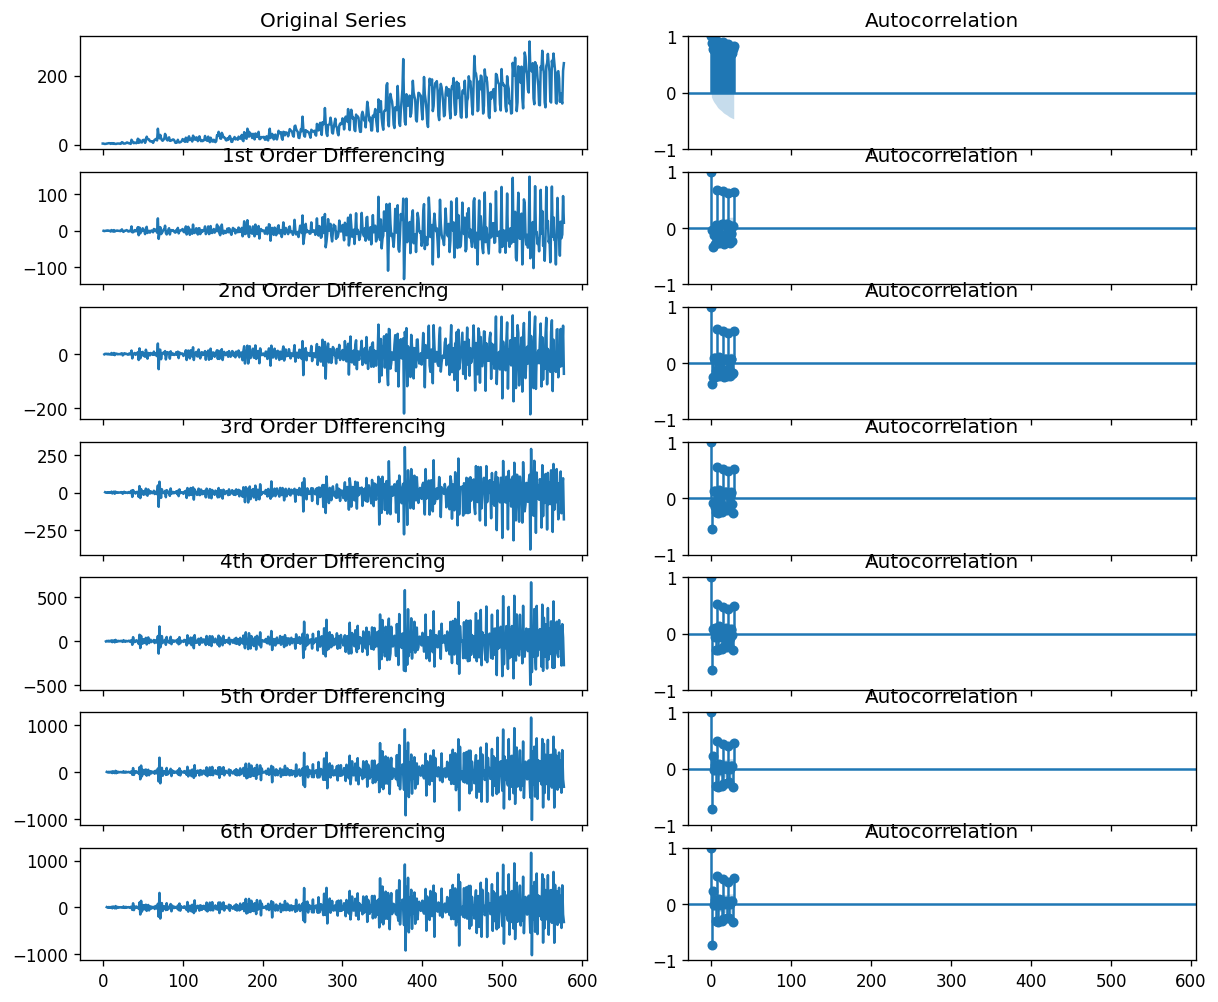

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(12,10), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(7, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df.value.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.value.diff().diff().diff().dropna(), ax=axes[3, 1])

# 3rd Differencing
axes[4, 0].plot(df.value.diff().diff().diff().diff()); axes[4, 0].set_title('4th Order Differencing')
plot_acf(df.value.diff().diff().diff().diff().dropna(), ax=axes[4, 1])

# 3rd Differencing
axes[5, 0].plot(df.value.diff().diff().diff().diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(df.value.diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])

# 3rd Differencing
axes[6, 0].plot(df.value.diff().diff().diff().diff().diff()); axes[6, 0].set_title('6th Order Differencing')
plot_acf(df.value.diff().diff().diff().diff().diff().dropna(), ax=axes[6, 1])

plt.show()

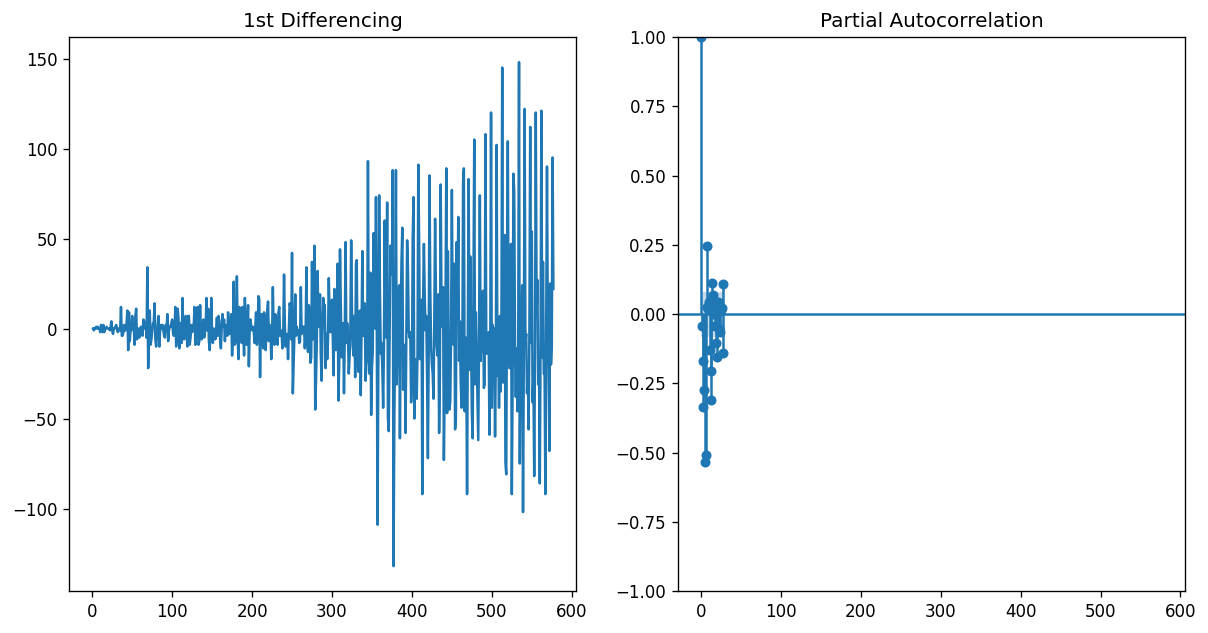

In [ ]:
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])
plt.show()

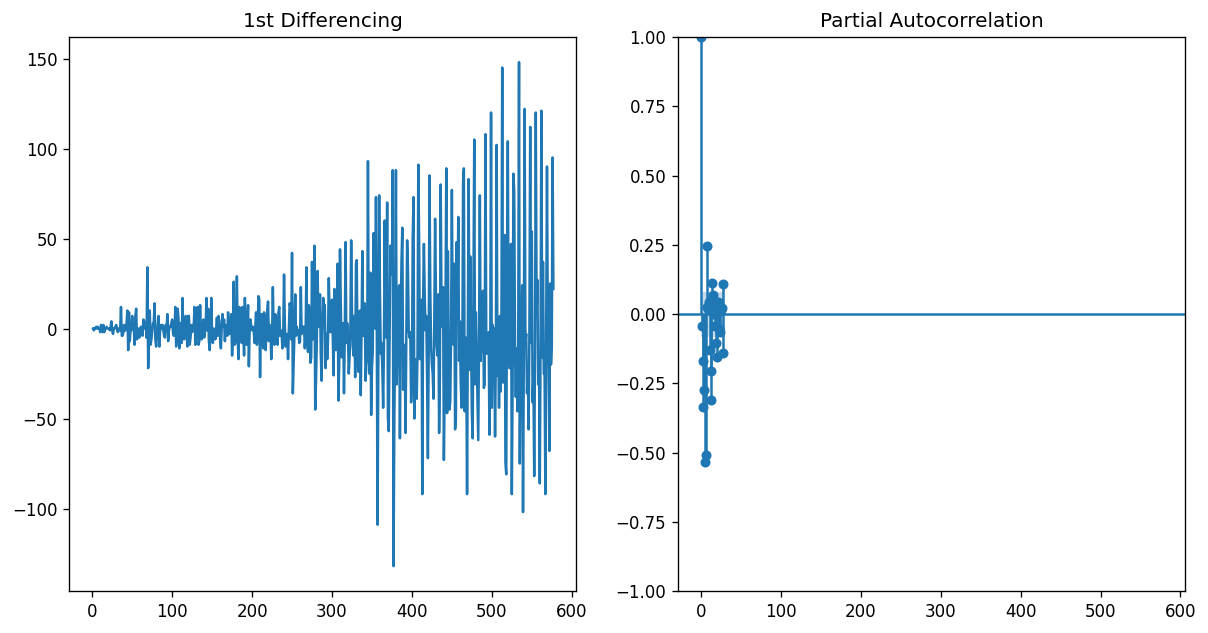

[ 1.         -0.04247015 -0.33536606 -0.17060441 -0.27474072 -0.53454296
 -0.50817916  0.2462361   0.0265962   0.0203191   0.04375342]
PACF lag 1 value: 1.0


In [ ]:
# prompt: how do i find the PACF lag 1 value

from statsmodels.graphics.tsaplots import plot_pacf, pacf
import matplotlib.pyplot as plt

# Assuming 'df' and 'plot_pacf' are defined as in your previous code

# Create the PACF plot (as you've already done)
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])
plt.show()

# Access the PACF values directly
pacf_values = pacf(df.value.diff().dropna(), method='ywm', nlags=10) # Example with 10 lags
print(pacf_values) # Output will vary depending on your data and method

# Extract the lag 1 value:
lag1_pacf = pacf_values[0]
print(f"PACF lag 1 value: {lag1_pacf}")


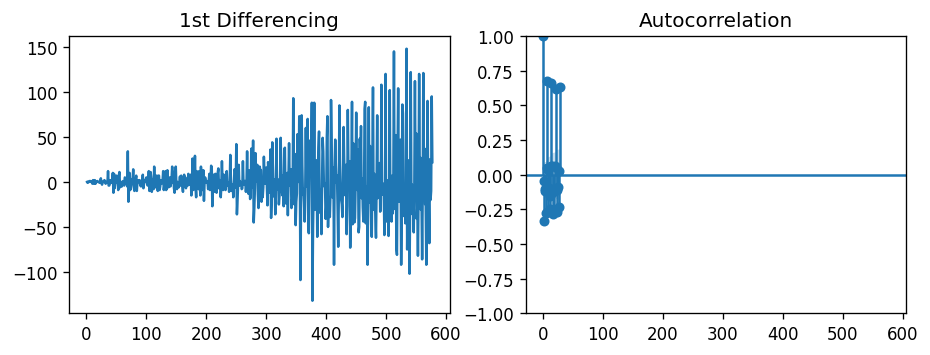

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#1,1,5 ARIMA model
model = ARIMA(df.value, order=(1,1,5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  578
Model:                 ARIMA(1, 1, 5)   Log Likelihood               -2689.746
Date:                Wed, 26 Feb 2025   AIC                           5393.492
Time:                        18:43:32   BIC                           5423.996
Sample:                             0   HQIC                          5405.387
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6416      0.082     -7.825      0.000      -0.802      -0.481
ma.L1          0.2706      0.076      3.545      0.000       0.121       0.420
ma.L2         -0.9102      0.041    -21.939      0.0

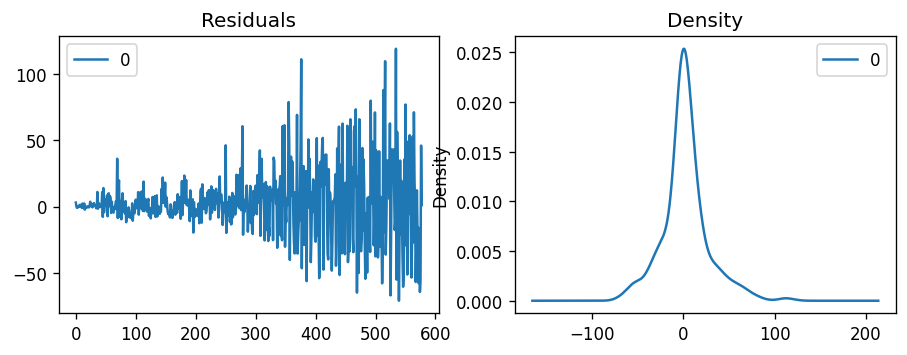

In [ ]:
#plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax = ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

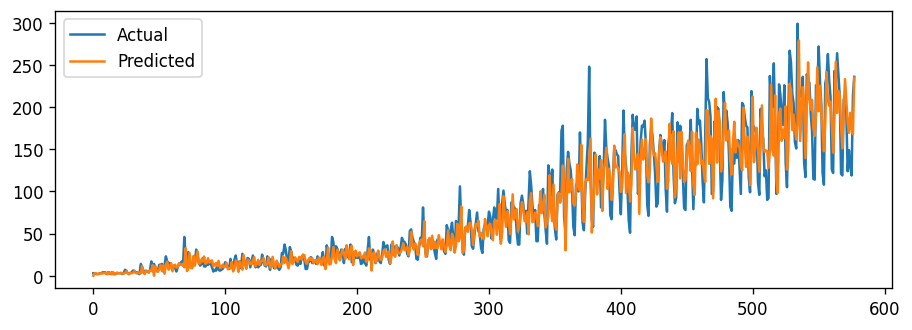

In [ ]:
#Actual vs fitted
predictions = model_fit.predict()  # Or model_fit.get_prediction() for more options

# Plot predictions against actual values
plt.plot(df.value, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
#out of time cross validation

from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:500]
test = df.value[500:]

In [ ]:
# prompt: find how many values on df

print(len(df))


578


In [ ]:
# Forecast

forecast_result = fitted.forecast(len(test), alpha=0.05)  # Get the forecast result
# Get confidence intervals using get_forecast
forecast_object = fitted.get_forecast(len(test), alpha=0.05)
conf = forecast_object.conf_int()  # Extract confidence intervals

fc = forecast_result.values

fc_series = pd.Series(fc, index=test.index)
# Access confidence intervals using column names or integer indexing
# Assuming 'lower' and 'upper' are the column names in 'conf'
lower_series = pd.Series(conf['lower value'], index=test.index)
upper_series = pd.Series(conf['upper value'], index=test.index)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


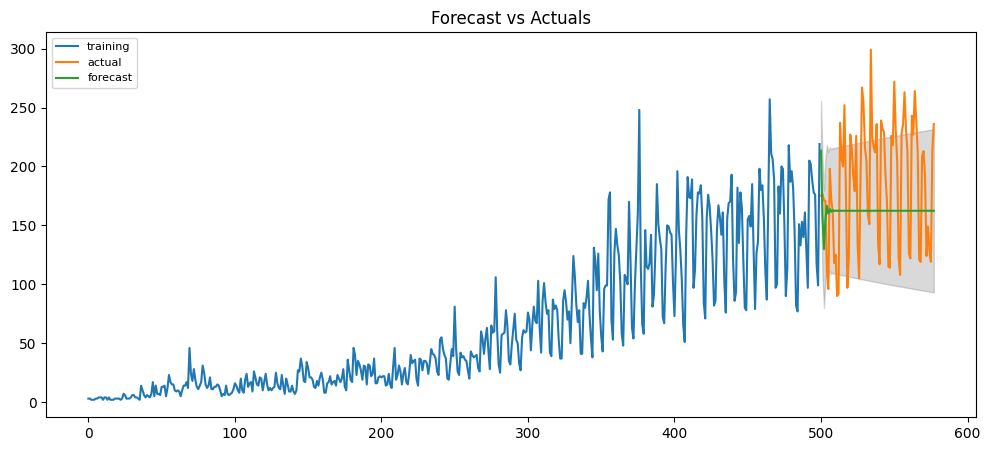

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  578
Model:                 ARIMA(4, 2, 5)   Log Likelihood               -2759.014
Date:                Wed, 26 Feb 2025   AIC                           5538.028
Time:                        19:01:42   BIC                           5581.589
Sample:                             0   HQIC                          5555.017
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.1549      0.016   -135.998      0.000      -2.186      -2.124
ar.L2         -2.7500      0.022   -126.627      0.000      -2.793      -2.707
ar.L3         -2.1494      0.022    -98.058      0.0

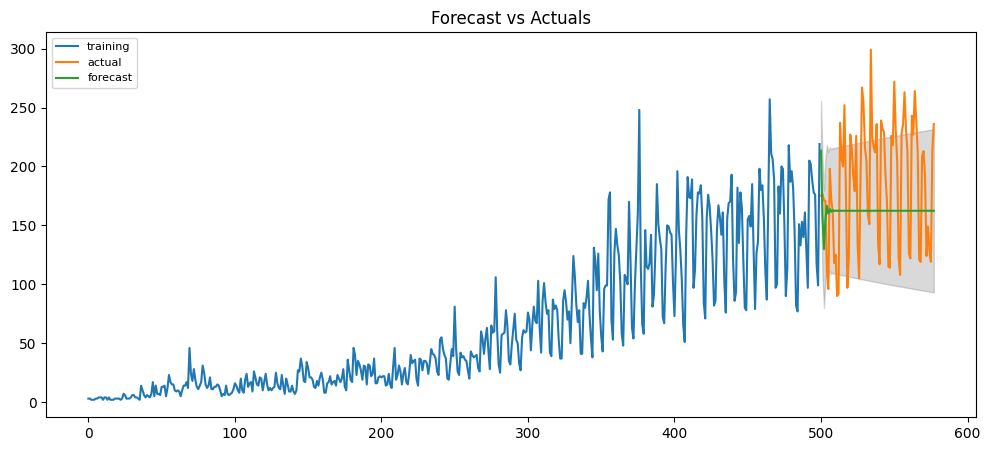

In [ ]:
model = ARIMA(df.value, order=(4,2,5))
model_fit = model.fit()
print(model_fit.summary())

# Forecast

forecast_result = fitted.forecast(len(test), alpha=0.05)  # Get the forecast result
# Get confidence intervals using get_forecast
forecast_object = fitted.get_forecast(len(test), alpha=0.05)
conf = forecast_object.conf_int()  # Extract confidence intervals

fc = forecast_result.values

fc_series = pd.Series(fc, index=test.index)
# Access confidence intervals using column names or integer indexing
# Assuming 'lower' and 'upper' are the column names in 'conf'
lower_series = pd.Series(conf['lower value'], index=test.index)
upper_series = pd.Series(conf['upper value'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.2909254576816578,
 'me': -22.309979571380318,
 'mae': 51.617903306824154,
 'mpe': -0.031824692158298085,
 'rmse': 57.5835850192823,
 'acf1': 0.39851413582723105,
 'corr': 0.0007037147095578916,
 'minmax': 0.2508602904814614}

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.6 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5689.526, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7031.589, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5688.152, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=6427.824, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5689.961, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5679.478, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5450.967, Time=0.54 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=5628.539, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5539.442, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5481.942, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5452.138, Time=1.39 sec

Best model:  ARIMA(3,0,1)(0,0,0)[0]          
Total fit time: 6.773 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  578
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -2720.483
Date:                Wed, 26 Feb 2025   AIC                           5450.967
Time:                        19:07:07   BIC                           5472.765
Sample:                             0   HQIC                          5459.467
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5250      0.034     45.150      0.000       1.459 

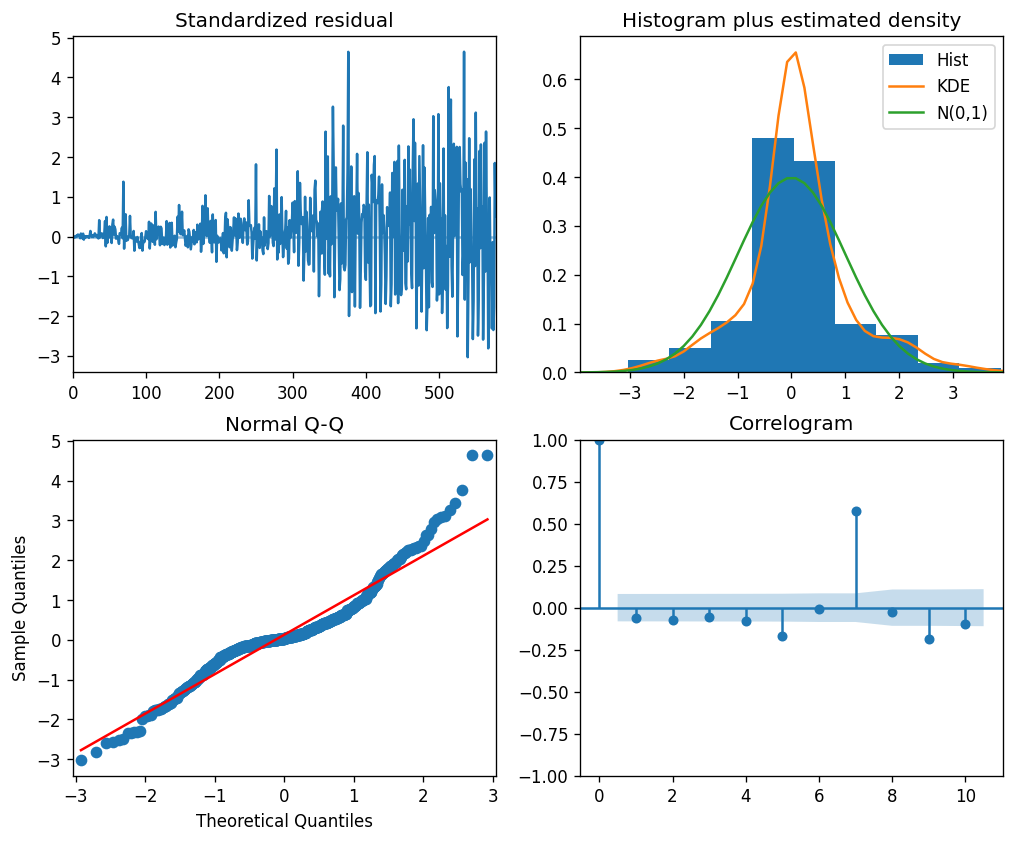

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


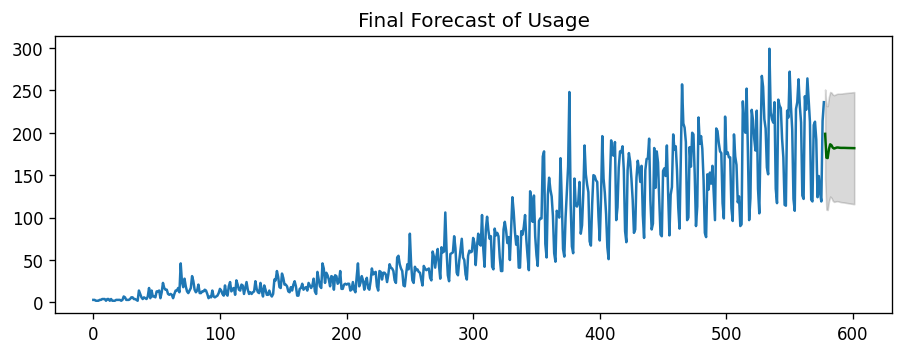

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

In [ ]:
data = pd.read_csv(path)

data = df.rename(columns={'count': 'value'})
data = df[['Date', 'value']]
data.head()

,Date,value
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [ ]:


path = '/content/sample_data/date_count.csv'

data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')


In [ ]:
data.head()

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2


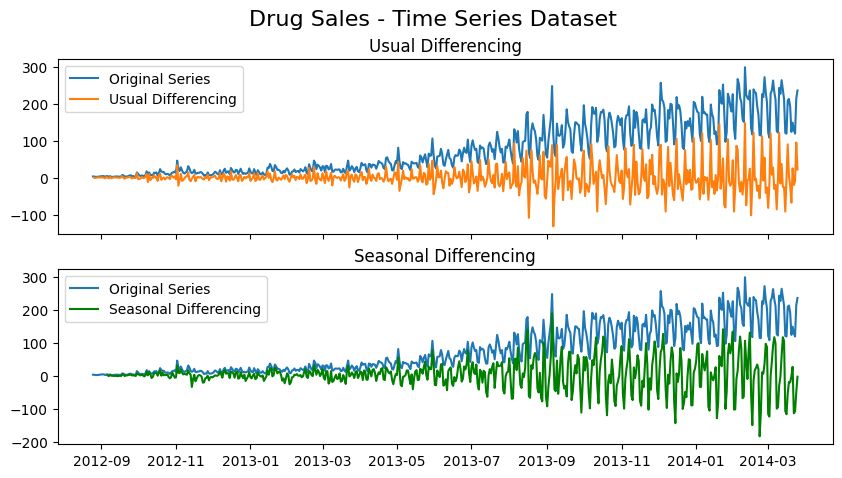

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle(' Time Series Dataset', fontsize=16)
plt.show()

In [ ]:
import pmdarima as pm

smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=8.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5965.201, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5719.129, Time=1.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5443.177, Time=1.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5966.417, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=5771.600, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=5442.147, Time=2.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=5636.466, Time=3.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=5417.396, Time=7.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=5509.833, Time=8.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=5418.547, Time=16.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=10.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=5517.251, Time=5.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=5418.663, Time=12.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(2,1,1)[12] intercept   : AIC=5418.510, Time=10.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=5432.864, Time=14.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,1,1)[12] intercept   : AIC=5420.954, Time=10.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,1,1)[12]             : AIC=5484.864, Time=2.42 sec

Best model:  ARIMA(0,0,1)(2,1,1)[12] intercept
Total fit time: 116.889 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  578
Model:             SARIMAX(0, 0, 1)x(2, 1, 1, 12)   Log Likelihood               -2702.698
Date:                            Wed, 26 Feb 2025   AIC                           5417.396
Time:                                    19:17:42   BIC                           5443.428
Sample:                                08-25-2012   HQIC                          5427.556
                                     - 03-25-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7408      0.806      8.363      0.000       5.161       8.321
ma.L1          0.4912      0.032     15.456      0.000       0.429       0.553
ar.S.L12      -0.2836      0.044     -6.450      0.000      -0.370      -0.197
ar.S.L24      -0.3001      0.045     -6.721      0.000      -0.388      -0.213
ma.S.L12      -0.6953      0.044    -15.745      0.000      -0.782      -0.609
sigma2       796.5810     39.298     20.270      0.000     719.558     873.604
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               307.22
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):              14.91   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


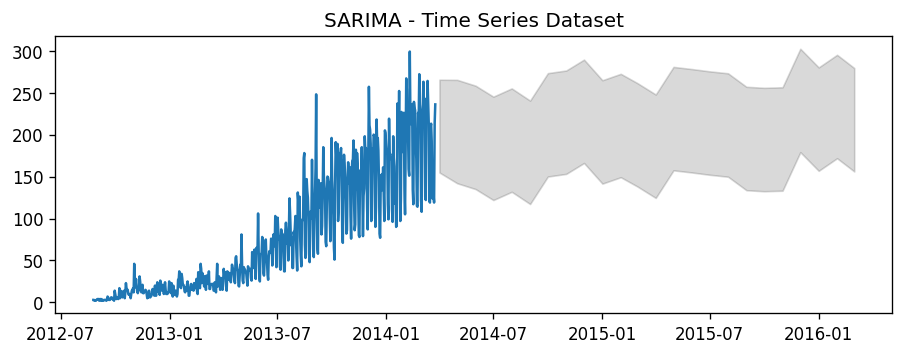

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA - Time Series Dataset")
plt.show()